# Python Lesson 1: Read, Write, Vizualize it!

## Agenda

1. Why Python?
2. Objectives
3. Setting up your development environment
4. Reading and writing tabular data with the Numpy library
5. Encapsulating data with the Pandas library
6. Plotting with the Matplotlib library
7. Working with NetCDF and HDF

## Why Python?

Pros
* General-purpose, cross-platform
* Free and open source
* Resaonably easy to learn, good statistical/visualization libraries
* Forces good syntax
* Reads satellite data formats like HDF, NetCDF, GRIB

Cons
* Performance penalties for interpretted languages (although cython and f2py libriries can be used)
* Libraries are a "black box" and can be discontinued

Other options:
* R: Specialized for statistics but prevalent in earth sciences. Python has borrowed some of the best R features (e.g. data frames).
* Fortran/C++: Most common in algorithm development, lots of legacy code. Speed +100, coding productivity -100 
* Matlab: License expensive (Octave is a reasonable alternative)
* IDL: Licenses expensive, there are better options out there

## Objective: working with satellite datasets

* You won't learn how to code in Python
	* Some (free!) ways to learn: [automate boring stuff](Automate the Boring Stuff with Python), [codeacademy](https://www.codecademy.com/learn/learn-python), [find Meetups](https://www.meetup.com/find/tech/) or start your own!
* You will learn to:
	* Read/write satellite datasets
	* Plot datasets
	* Perform re-gridding, averaging, 

## Development environments: How do I Python?
* Spyder: most Matlab-like
* Text editor + command line
* Jupyter notebooks: web based, accessible everywhere (need a server)

## Launching Jupyter Notebook
You need *Anaconda Python* installed! You can also [install with pip](http://jupyter.org/install.html), but you're on your own.

### Macs/Unix:
* Open terminal, and type:
```
cd to/the/directory/
jupyter notebook    
```

### Windows:
* Open Anaconda Prompt
```
cd to\the\directory\
jupyter notebook    
```

## Launching Jupyter Notebook

This will launch your default web browser with a local webserver that displays the contents of the directory that you're working in. 

Click on New on the top right:
![](img/ipython-notebook.PNG)

You can edit and run code directly in this notebook (similar to Mathematica):

In [ ]:
# This is a comment
print("hello world")

# This is math
2+2

#This is an array
test=[1, 2, 3, 4]

# This will show me the array
print(test)

# This is a function (note the TAB!)
def Farenheit2Celsius(F):
    return (F-32)*5/9

# This calls the function
Farenheit2Celsius(32)

## Importing libraries
Packages/libraries give us additional functionality, saving us the trouble of writing procedures ourselves. One of the most populat in scientific computing is [numpy](http://www.numpy.org/)
```python
import numpy as np
```
The "as np" part is optional, but is a good practice so you know where the functions come from.

## Numpy

The "as np" part is optional, but is a good practice so you know where the functions come from.

## Defining Arrays
```python
a = np.arange(15).reshape(3, 5)
a.shape
a.size
```
Note: if you do not assign the operation to a variable, then it will print to the screen and NOT be stored.

## Array operations
```python
b = np.arange(12).reshape(3,4)
b
# Sum along rows
b.sum(axis=0)
# Get the minimum value along columns
b.min(axis=1)
# Boolean operations
b>1
```
For more examples, work through the: [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

# Pandas

In [39]:
import pandas as pd
pd.options.display.max_rows = 8

url = 'https://aeronet.gsfc.nasa.gov/aeronet_locations_v3.txt'
stationList = pd.read_csv(url, skiprows=1)

# Show column names - kind of ugly
list(stationList)

# Make easier to write
stationList.columns = ['site', 'lon', 'lat', 'elev']
stationList


,site,lon,lat,elev
0,Cuiaba,-56.070214,-15.555244,234.00
1,Alta_Floresta,-56.104453,-9.871339,277.00
2,Jamari,-63.068552,-9.199070,129.00
3,Tucson,-110.953003,32.233002,779.00
...,...,...,...,...
1437,ARM_Cordoba,-64.728370,-32.126410,1141.00
1438,NEON_YELL,-110.539140,44.953480,2116.00
1439,Payerne,6.942019,46.812408,491.00
1440,Lopbury,101.187361,15.266667,49.28


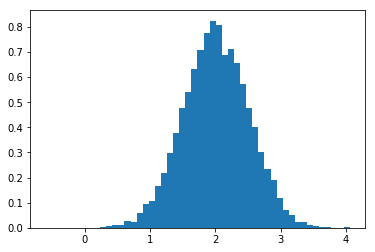

In [42]:
# Matplotlib
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 2, 0.5
v = np.random.normal(mu, sigma, 10000)

# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, density=1)
plt.show()

## Basemap is dead --> Use [CartoPy](https://scitools.org.uk/cartopy/)
NOT included in base anaconda, need to install yourself.

Open the terminal (\*nix) or Anaconda Prompt (Windows) and type: 
```python
conda install -c conda-forge cartopy
```
* Rather than import all of cartopy, we just want the projection classes to pair with matplot lib.
* More [map projections](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html).

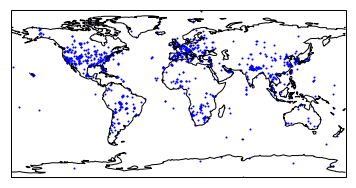

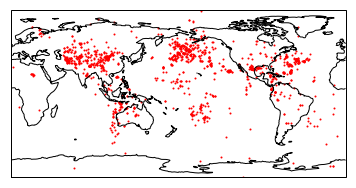

In [67]:
import cartopy.crs as ccrs
# time saver: ccrs will substitute for typing out cartopy.crs
import matplotlib.pyplot as plt

# Center on the Atlantic
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(stationList['lon'], stationList['lat'], color='blue', s=1)
plt.show()

# Center on the Pacific
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-180))
ax.coastlines()
plt.scatter(stationList['lon'], stationList['lat'], color='red', s=1)
plt.show()

## netCDF4
```
from netCDF4 import Dataset, num2date
```
